# **Loading of data**

In [0]:
%matplotlib inline

import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
import sklearn.model_selection
from sklearn.metrics import mean_squared_error


import xgboost as xgb


In [0]:
boston = load_boston()

In [4]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

# **Preparing and splitting the data**

In [0]:
# First we package up the input data and the target variable (the median value) as pandas dataframes. This
# will make saving the data to a file a little easier later on.

X_bos_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
Y_bos_pd = pd.DataFrame(boston.target)

# We split the dataset into 2/3 training and 1/3 testing sets.
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_bos_pd, Y_bos_pd, test_size=0.33)

# Then we split the training set further into 2/3 training and 1/3 validation sets.
X_train, X_val, Y_train, Y_val = sklearn.model_selection.train_test_split(X_train, Y_train, test_size=0.33)

# **XGBoost**

In [0]:
#Hyperparameter

model = xgb.XGBRegressor(max_depth=5,eta=0.2,gamma=4,
                         min_child_weight=6,subsample=0.8,
                         objective='reg:linear',early_stopping_rounds=10,
                         num_round=200)

In [0]:
#Applying of model

model.fit(X_train,Y_train)

model.predict(X_test)

# **Test the model**

In [48]:
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
             eta=0.2, gamma=4, importance_type='gain', learning_rate=0.1,
             max_delta_step=0, max_depth=5, min_child_weight=6, missing=None,
             n_estimators=100, n_jobs=1, nthread=None, num_round=200,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=0.8,
             verbosity=1)

In [0]:
Y_pred = model.predict(X_test)

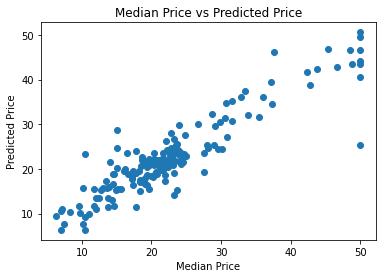

RMSE: 4.005352


In [54]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Median Price")
plt.ylabel("Predicted Price")
plt.title("Median Price vs Predicted Price")
plt.show()

rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE: %f" % (rmse))